Problem Statement:
    
    About this Dataset:
        
    The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

    000 001 002 003 ... 026 027
    028 029 030 031 ... 054 055
    056 057 058 059 ... 082 083
     |   |   |   |  ...  |   |
    728 729 730 731 ... 754 755
    756 757 758 759 ... 782 783 

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

    ImageId,Label
        1,3
        2,7
        3,8 
    (27997 more lines)

The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.



Convolutional Neural Networks (CNN)


Content:

    Loading the Data Set
    Normalization, Reshape and Label Encoding
    Train Test Split
    Convolutional Neural Network
        What is Convolution Operation?
        Same Padding
        Max Pooling
        Flattening
        Full Connection
    Implementing with Keras
        Create Model
        Define Optimizer
        Compile Model
        Epochs and Batch Size
        Data Augmentation
        Fit the Model
        Evaluate the Model
    Deep Learning Tutorial for Beginners
    Artificial Neural Network with Pytorch
    Convolutional Neural Network with Pytorch
    Recurrent Neural Network with Pytorch
    Conclusion



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load and visualize the data

train_images = pd.read_csv('train.csv')

In [4]:
train_images.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
test_images = pd.read_csv('test.csv')
test_images.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


From train data we have label column have other columns are pixel columns each indicating intensity or grayscale colors, closer to 0 values indicate lighter or whiter whereas higher values indicate darker images pixels.

In [8]:
print(train_images.shape)
print()
print(test_images.shape)

(42000, 785)

(28000, 784)


From the above train and test images, we need to segregate X and Y data to do our training and testing or to be able to use Xtrain, Xtest Ytrain ytest for training and testing purposes.

In the data dependant variable is the label column. 

Problem statement is to classify labels given pixel data. hence we use label column as Y. Use Y to train data. Then use test data to predict Ytest.

In [10]:
Y_train = train_images['label']
Y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [9]:
X_train = train_images.drop(columns=['label'])
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We have both X_train, Y_train to train our data. But first lets do some visualization

Text(0.5, 1.0, 'Number of digit classes')

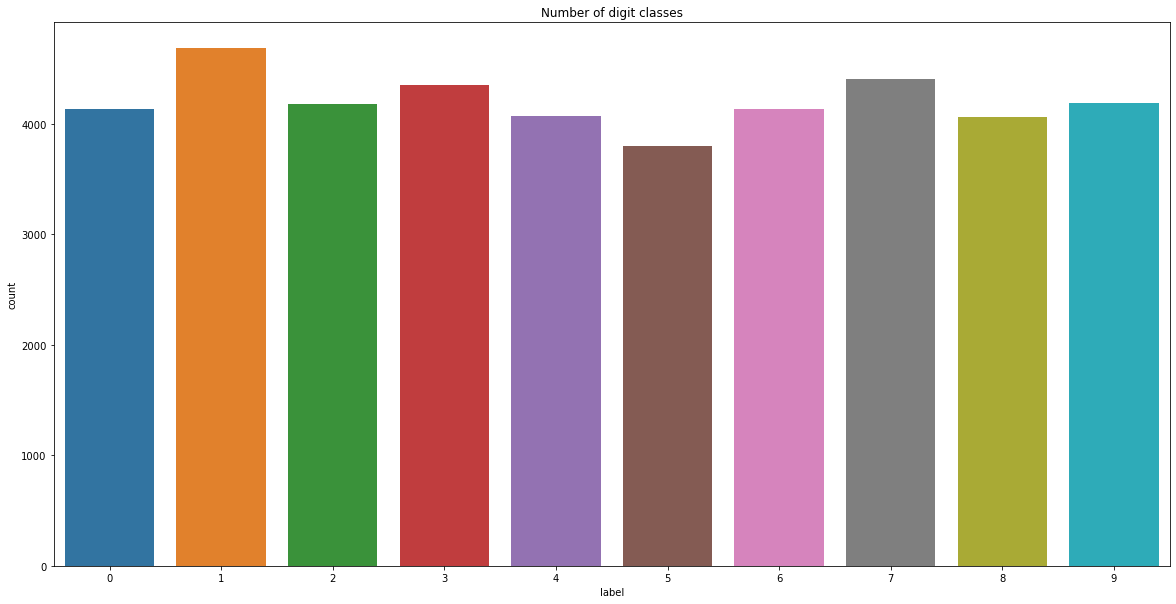

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.countplot(Y_train)
plt.title('Number of digit classes')

So the data is balanced data as the number of classes are more or less the same.

In [13]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

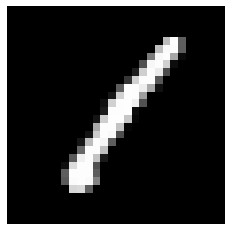

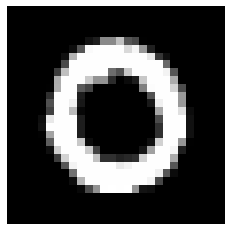

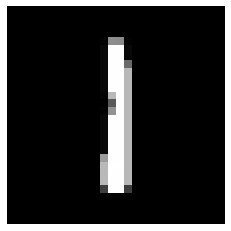

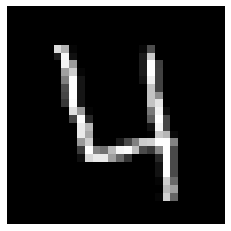

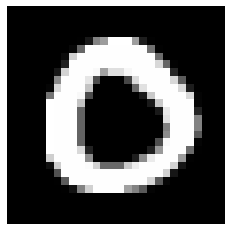

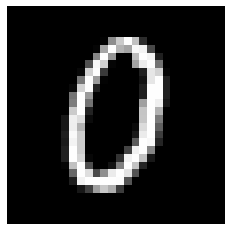

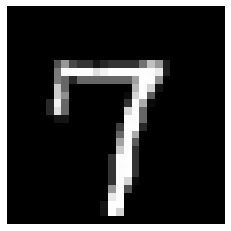

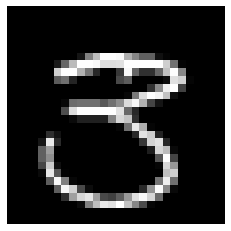

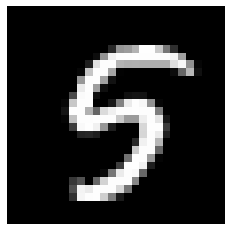

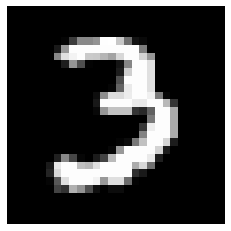

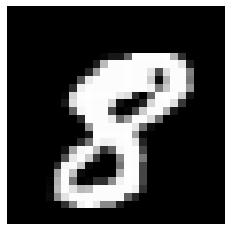

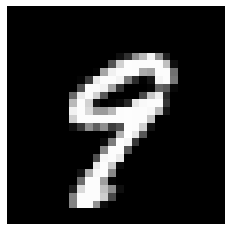

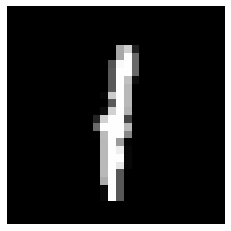

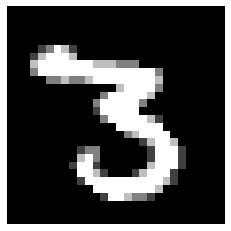

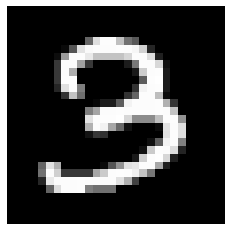

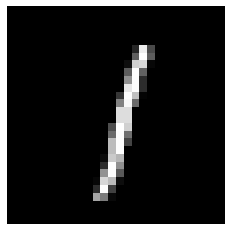

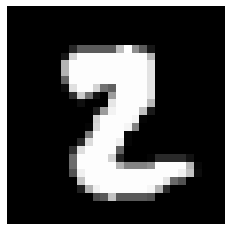

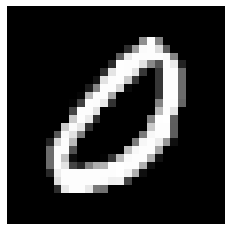

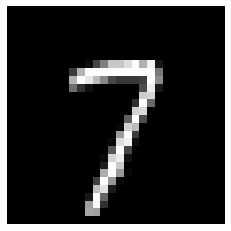

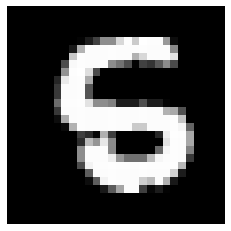

In [31]:
# plot first 20 samples from the training set

from random import randint

for i in range(20):
    img = X_train.iloc[i].to_numpy()
    img = img.reshape(28,28)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

###### Normalization, Reshape and Label Encoding


    Normalization
        We perform a grayscale normalization to reduce the effect of illumination's differences.
        If we perform normalization, CNN works faster.
    Reshape
        Train and test images (28 x 28)
        We reshape all data to 28x28x1 3D matrices.
        Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel.
    Label Encoding
        Encode labels to one hot vectors
            2 => [0,0,1,0,0,0,0,0,0,0]
            4 => [0,0,0,0,1,0,0,0,0,0]


In [32]:
#Normalize data

X_train = X_train / 255.
test_images = test_images / 255.

print(X_train.shape)
print(test_images.shape)

(42000, 784)
(28000, 784)


In [33]:
#Reshape

X_train = X_train.values.reshape(-1, 28, 28, 1)
test_images = test_images.values.reshape(-1, 28, 28, 1)
print('x_train shape: ', X_train.shape)
print('test images shape: ', test_images.shape)

x_train shape:  (42000, 28, 28, 1)
test images shape:  (28000, 28, 28, 1)


In [54]:
#Label Encoding

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

Train Test Split

    We split the data into train and test sets.
    test size is 10%.
    train size is 90%.

In [55]:
Y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_val.shape)
print('Y_train shape: ', Y_train.shape)
print('Y_test shape: ', Y_val.shape)

X_train shape:  (34020, 28, 28, 1)
X_test shape:  (3780, 28, 28, 1)
Y_train shape:  (34020, 10)
Y_test shape:  (3780, 10)


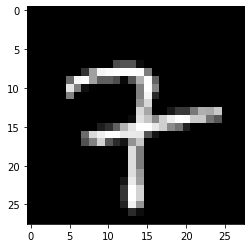

In [61]:
plt.imshow(X_train[5][:,:,0], cmap='gray')

###### Convolutional neural network

CNN is used for image classification, object detection 

![cnn](image_cnn.jpg)

What is convolution operation?

1. We have some image and feature detector(3*3)
2. Feature detector can be 5x5 or 7x7 as well.
3. Feature detector = kernel = filter
4. Feature detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog. 
5. feature map = conv(input image, feature detector). Element wise multiplication of matrices.
6. feature map = convoluted feature
7. stride = navigating in input image
8. We reduce the size of image. this is important bhecause code runs faster. however, we lose information.
9. We create multiple feature maps because we use multiple feature detectors(filters)

10. Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]

![cnn1](image_cnn2.jpg)

11. After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.

![cnn2](image_cnn3.jpg)


###### Same Padding

12. As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.

13. input size and output size are same.

![cnn3](image_cnn4.jpg)

14. To do this we make use of padding. adding layers of 0s to retain size of volume.

###### Max Pooling

15. It makes down-sampling or sub-sampling(Reduces number of parameters)
16. It makes the detection of features invariant to scale or orientation changes.
17. It reduces the amount of parameters and computation in the network and hence to also control overfitting.

![cnn5](image_cnn5.jpg)


###### Flattening

![cnn6](image_cnn6.jpg)

###### Full connected layer

18. Neuron in a FC layer have connections to all activations in the previous layer
19. Artificial neural network

![cnn7](image_cnn7.jpg)

###### Implementing with Keras

20. conv => maxpool => dropout => conv => maxpool => dropout => FC(2 layers)
21. Dropout: dropout is a technique where randomly selected neurons are ignored during training. 
    
![cnn8](image_cnn8.jpg)

In [66]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#FC layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [67]:
#Define optimizer and change learning rate

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

###### compile Model

1. Categorical cross-entropy
2. We use categorical cross entropy. That means we have multi class.

![cnn9](image_cnn9.jpg)

In [68]:
#model compile

model.compile(optimizer= optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

###### Epochs and batch size

Say you have a dataset of 10 examples, You have batch size of 2, and you've specified you want the algorithm to run for 3 epochs. therefore, in each epoch you have 5 batches. Each batch gets passed through algorithm, therefore you have 5 iterations per epoch

In [69]:
epochs = 10
batch_size = 250

###### Data Augmentation

1. To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
2. Alter the training data with small transformations to reproduce the variations of digit
3. For example, the number is not centered The scale is not the same(some who write big or small numbers)

![cnn10](image_cnn10.jpg)

In [70]:
#data Augmentation

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

###### Fit the model

In [104]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size), 
                             epochs=30, validation_data=(X_val, Y_val), steps_per_epoch=X_train.shape[0]//batch_size)

Epoch 1/30
136/136 [==============================] - 11s 81ms/step - loss: 0.1771 - accuracy: 0.9459 - val_loss: 0.0499 - val_accuracy: 0.9857
Epoch 2/30
136/136 [==============================] - 11s 83ms/step - loss: 0.1717 - accuracy: 0.9473 - val_loss: 0.0482 - val_accuracy: 0.9862
Epoch 3/30
136/136 [==============================] - 11s 79ms/step - loss: 0.1629 - accuracy: 0.9496 - val_loss: 0.0477 - val_accuracy: 0.9849
Epoch 4/30
136/136 [==============================] - 11s 82ms/step - loss: 0.1565 - accuracy: 0.9521 - val_loss: 0.0463 - val_accuracy: 0.9860
Epoch 5/30
136/136 [==============================] - 11s 79ms/step - loss: 0.1476 - accuracy: 0.9548 - val_loss: 0.0456 - val_accuracy: 0.9857
Epoch 6/30
136/136 [==============================] - 11s 80ms/step - loss: 0.1468 - accuracy: 0.9539 - val_loss: 0.0437 - val_accuracy: 0.9868
Epoch 7/30
136/136 [==============================] - 11s 84ms/step - loss: 0.1413 - accuracy: 0.9569 - val_loss: 0.0433 - val_accuracy:

###### Evaluate the model

1. Test Loss visualization
2. Confusion matrix

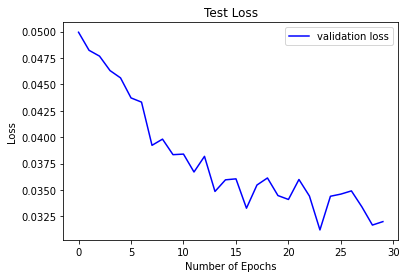

In [105]:
#Plot the loss and accuracy curves for training and validation

plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

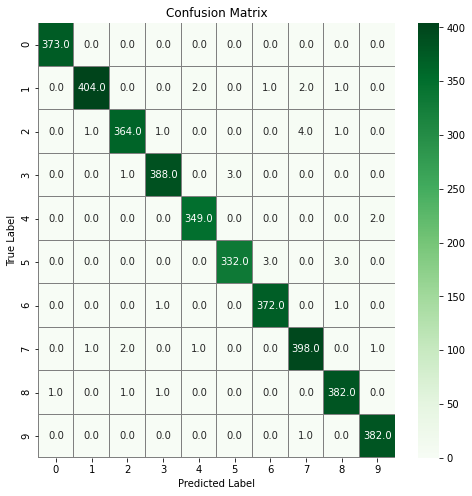

In [106]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

For better understanding of convnets - https://technoelearn.com/convolutional-neural-network-tutorial/

###### Saving the model

In [107]:
model.save('trained_model.h5')

###### Prediction on new data

In [109]:
from keras.models import load_model

In [110]:
pretrained_model = load_model('trained_model.h5')

Now we had imported test.csv as test_images, we need to have that pixel data in the same form as X_train and Y_train. So basically we will create X_test and predict Y_test or Y_pred using the saved model

In [111]:
# predict results
results = pretrained_model.predict(test_images)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [112]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)